In [1]:
import numpy as np # rename the library to np for convenience
import matplotlib.pyplot as plt # we want the "pyplot" module

from IPython.display import Audio # listening to audio
from skimage import io # image i/o
from skimage import transform # image transformations
from scipy import signal
from scipy.io import wavfile # audio i/o

# allows plots to display in the notebook instead of another window
%matplotlib inline

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Orion\AppData\Local\Temp\ipykernel_28384\3459262936.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$')


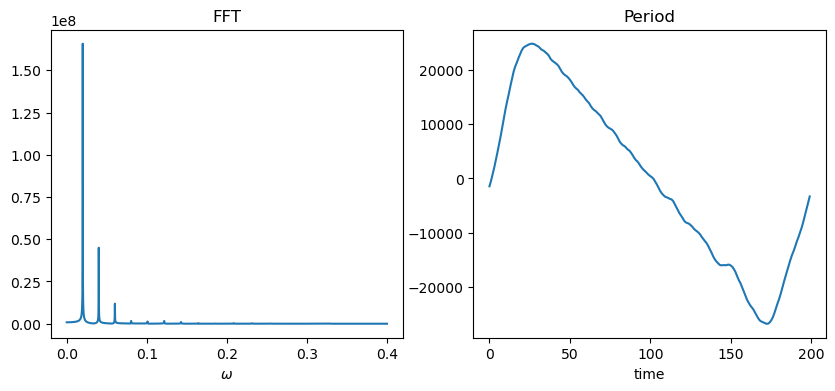

In [185]:
#fs = 48000
fs, sound = wavfile.read('23d.wav')
sound = sound[0:30000]
sound_fft = np.fft.rfft(sound)[0:3000]
freq = np.linspace(0, 0.4, len(sound_fft))
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(freq, abs(sound_fft))
plt.title('FFT')
plt.xlabel('$\omega$')
plt.subplot(122)
plt.plot(sound[200:400])
plt.title('Period')
plt.xlabel('time')
Audio(data=[sound,sound], rate=fs)

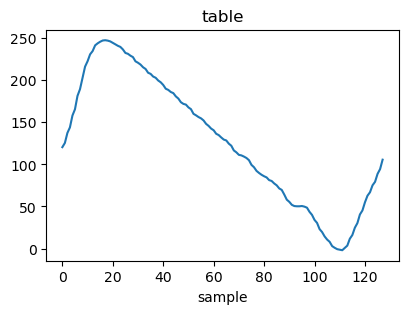

In [186]:
guitar_lut = np.zeros(128)
period = sound[200:400]
for i in range(128):
    guitar_lut[i] = period[int(i*1.5625)]
guitar_lut = (guitar_lut/207) + (255/2)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(guitar_lut)
plt.title('table')
plt.xlabel('sample')

freq = 220
phase_step = freq*((2**32)-1)/fs
play = np.zeros(80000) # to play enough time to hear
dec = 1
for i in range (80000):
    phase = (phase + phase_step)%(2**32) # 32-bit phase
    phase_in = int((phase/(2**26))-1) # take top 6 bits
    #div = int(2**(0.00009*i))
    if i%16384 == 0:
        dec = dec*2
    play[i] = guitar_lut[phase_in]*(2**(-0.00016*i))

Audio(data=[3*play,3*play], rate=fs)

# for i in range(128):
#     print("7'd",i, ": amp_out<=8'd",int(guitar_lut[i]),";")

<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Orion\AppData\Local\Temp\ipykernel_28384\1647443634.py:9: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$')


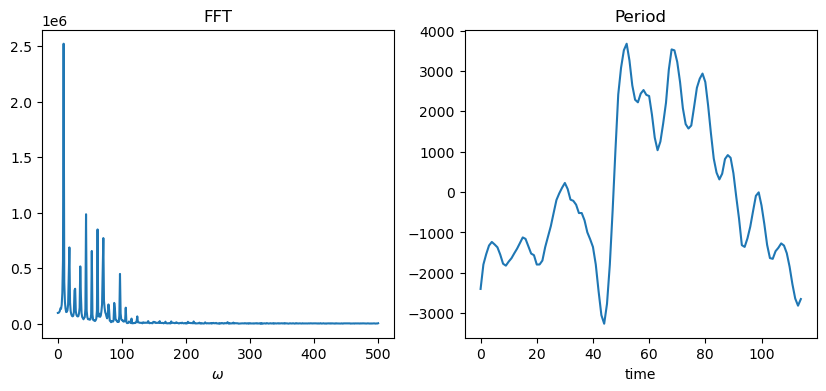

In [144]:
fsv, soundv = wavfile.read('violin.wav')
soundv = np.transpose(soundv)[0]
freq = np.linspace(0, 0.4, len(soundv[5000:6000]))
soundv_fft = np.fft.rfft(soundv[5000:6000])
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(abs(soundv_fft))
plt.title('FFT')
plt.xlabel('$\omega$')
plt.subplot(122)
plt.plot(soundv[2030:2145])
plt.title('Period')
plt.xlabel('time')
Audio(data=[soundv, soundv], rate=fsv)

Text(0.5, 0, 'sample')

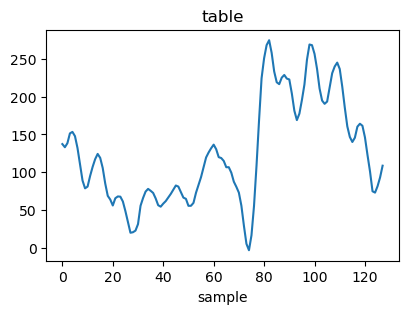

In [162]:
v_period = soundv[5110:5226]
violin_lut = np.zeros(128)
for i in range(128):
    violin_lut[i] = (v_period[int(i*0.9)]+v_period[int(i*0.91)])/2
violin_lut = (violin_lut/75) + (255/2)
violin_lut = (soundv[2000:2128]/25) + (255/2)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(violin_lut)
plt.title('table')
plt.xlabel('sample')

# for i in range(128):
#     print("7'd",i, ": amp_out<=8'd",int(violin_lut[i]),";")

In [189]:
phase = 0
fs = 48000
violin_lut = (soundv[2000:2128]/29) + (255/2)
for i in range(128):
    print("        7'd{}".format(i),": amp_out<=8'd{};".format(int(violin_lut[i])))
freq = 440
phase_step = freq*((2**32)-1)/fs
sound = np.zeros(80000) # to play enough time to hear
dec = 1
for i in range (80000):
    phase = (phase + phase_step)%(2**32) # 32-bit phase
    phase_in = int((phase/(2**26))-1) # take top 6 bits
    #div = int(2**(0.00009*i))
    if i%16384 == 0:
        dec = dec*2
    sound[i] = violin_lut[phase_in]

Audio(data=[sound,sound], rate=fs)

        7'd0 : amp_out<=8'd135;
        7'd1 : amp_out<=8'd132;
        7'd2 : amp_out<=8'd136;
        7'd3 : amp_out<=8'd148;
        7'd4 : amp_out<=8'd149;
        7'd5 : amp_out<=8'd144;
        7'd6 : amp_out<=8'd131;
        7'd7 : amp_out<=8'd112;
        7'd8 : amp_out<=8'd94;
        7'd9 : amp_out<=8'd85;
        7'd10 : amp_out<=8'd87;
        7'd11 : amp_out<=8'd99;
        7'd12 : amp_out<=8'd109;
        7'd13 : amp_out<=8'd118;
        7'd14 : amp_out<=8'd124;
        7'd15 : amp_out<=8'd120;
        7'd16 : amp_out<=8'd108;
        7'd17 : amp_out<=8'd91;
        7'd18 : amp_out<=8'd77;
        7'd19 : amp_out<=8'd72;
        7'd20 : amp_out<=8'd66;
        7'd21 : amp_out<=8'd74;
        7'd22 : amp_out<=8'd76;
        7'd23 : amp_out<=8'd76;
        7'd24 : amp_out<=8'd70;
        7'd25 : amp_out<=8'd59;
        7'd26 : amp_out<=8'd47;
        7'd27 : amp_out<=8'd34;
        7'd28 : amp_out<=8'd35;
        7'd29 : amp_out<=8'd37;
        7'd30 : amp_out<=8'd44;
     